https://www.kaggle.com/aakcay15/myfirsthomework

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns #visualization tool

#data_credits = pd.read_csv("./tmdb-movie-metadata/tmdb_5000_credits.csv")
data = pd.read_csv("./tmdb-movie-metadata/tmdb_5000_movies.csv")
# data.info()
# data.columns

data2 = pd.read_csv("./tmdb-movie-metadata/tmdb_5000_credits.csv")
data2.info()
data2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [2]:
data.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [3]:
# movie join crew
merged_info = data.rename(columns={'id': 'movie_id'}).merge(data2, how='inner', on='movie_id')

# 최종 sample: except 0budget , 0revenue
sample = merged_info[(merged_info.budget != 0) & (merged_info.revenue != 0)]

# net_profit 추가
sample['net_profit'] = sample.revenue - sample.budget
sample.corr()


C:\Users\soo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,net_profit
budget,1.000000,0.013624,0.431990,0.705399,0.229490,-0.031208,0.540165,0.550252
movie_id,0.013624,1.000000,0.177854,0.030112,-0.033430,-0.067064,0.106880,0.031648
popularity,0.431990,0.177854,1.000000,0.602246,0.182198,0.286994,0.749088,0.588190
revenue,0.705399,0.030112,0.602246,1.000000,0.233074,0.187839,0.756210,0.980003
runtime,0.229490,-0.033430,0.182198,0.233074,1.000000,0.378641,0.257922,0.210144
vote_average,-0.031208,-0.067064,0.286994,0.187839,0.378641,1.000000,0.377658,0.230041
vote_count,0.540165,0.106880,0.749088,0.756210,0.257922,0.377658,1.000000,0.739198
net_profit,0.550252,0.031648,0.588190,0.980003,0.210144,0.230041,0.739198,1.000000


In [4]:
sample['release_date'] = pd.to_datetime(sample.release_date)
sample.sort_values('movie_id')
# sorted_sample = sample.sort_values('release_date')
# sorted_sample.head(1).release_date #오름차순

C:\Users\soo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,net_profit
3766,4000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",NaN,5,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na...",en,Four Rooms,It's Ted the Bellhop's first night on the job....,22.876230,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,530,Four Rooms,"[{""cast_id"": 42, ""character"": ""Ted the Bellhop...","[{""credit_id"": ""52fe420dc3a36847f800012d"", ""de...",300000
2912,11000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.starwars.com/films/star-wars-episod...,11,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...",en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624,Star Wars,"[{""cast_id"": 3, ""character"": ""Luke Skywalker"",...","[{""credit_id"": ""52fe420dc3a36847f8000437"", ""de...",764398007
328,94000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://movies.disney.com/finding-nemo,12,"[{""id"": 494, ""name"": ""father son relationship""...",en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,6122,Finding Nemo,"[{""cast_id"": 8, ""character"": ""Marlin (voice)"",...","[{""credit_id"": ""52fe420ec3a36847f80006b1"", ""de...",846335536
809,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,13,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7927,Forrest Gump,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de...",622945399
2516,15000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.dreamworks.com/ab/,14,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",en,American Beauty,"Lester Burnham, a depressed suburban father in...",80.878605,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Look closer.,American Beauty,7.9,3313,American Beauty,"[{""cast_id"": 6, ""character"": ""Lester Burnham"",...","[{""credit_id"": ""52fe420ec3a36847f8000809"", ""de...",341296601
2799,12800000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,16,"[{""id"": 30, ""name"": ""individual""}, {""id"": 246,...",en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",22.022228,"[{""name"": ""Fine Line Features"", ""id"": 8}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You don't need eyes to see.,Dancer in the Dark,7.6,377,Dancer in the Dark,"[{""cast_id"": 33, ""character"": ""Selma Jezkova"",...","[{""credit_id"": ""52fe420ec3a36847f8000981"", ""de...",27231879
322,90000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,18,"[{""id"": 402, ""name"": ""clone""}, {""id"": 444, ""na...",en,The Fifth Element,"In 2257, a taxi driver is unintentionally give...",109.528572,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,There is no future without it.,The Fifth Element,7.3,3885,The Fifth Element,"[{""cast_id"": 5, ""c

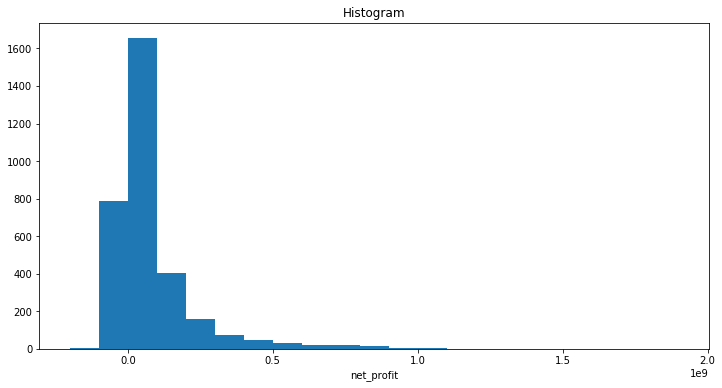

In [5]:
# net_profit histogram 

list = []
for i in range(-2,20):
    list.append(i*pow(10,8)) #천만 
    
plt.figure(figsize=(12, 6))
plt.hist(sample['net_profit'], list)
plt.xlabel("net_profit")
plt.title("Histogram")
plt.show()


In [6]:
import io
import json
from pandas.io.json import json_normalize
# pd.DataFrame(data2)
# data2.cast.apply(pd.Series)

### actors DataFrame 생성

In [7]:
# actors DataFrame생성
actors = pd.DataFrame(columns=['actor_id','name','movie_id']) 

# 파싱
for index,row in sample.iterrows():
    movie_id = row["movie_id"]
    cast = json.loads(row['cast']) #각 영화의 cast
    top = json.dumps(cast[0:5])  # 각 영화의 주연배우 top5
    
    for actor in json.loads(top): #actors DataFrame에 넣기
        actors.loc[len(actors)] =[actor['id'], actor['name'],movie_id]

        
#             index = actor['id']
#             if actors.loc[actors[['actor_id'] == index]]:  
#                 actors.loc[index,'movie'].append(movie_id)
#             else:
#                 actors.loc[index] =[actor['id'], actor['name'],movie_id]  
# #         else: 
# #             exist = actors.loc[actors[['actor_id'] == actor['id']]]
# #             actors.loc[exist['id'],'movie'].append(movie_id) #ac['id']와 같은열의 movie배열에 추가
                

actors
# actors # 16076 rows
# act2 = actors.drop_duplicates('actor_id', keep='first')
# act2 # 6163 rows
# actors2.drop_duplicates('movie_id', keep='first') #3227 rows

,actor_id,name,movie_id
0,65731,Sam Worthington,19995
1,8691,Zoe Saldana,19995
2,10205,Sigourney Weaver,19995
3,32747,Stephen Lang,19995
4,17647,Michelle Rodriguez,19995
5,85,Johnny Depp,285
6,114,Orlando Bloom,285
7,116,Keira Knightley,285
8,1640,Stellan Skarsgård,285
9,1619,Chow Yun-fat,285


##### checkkpoint

In [8]:
# 정렬 
actors2 = pd.concat(g for _, g in actors.groupby('actor_id'))
actors2

# movie_id 배우별로 배열로 묶었을때
# act3 = actors.groupby('actor_id').apply(lambda x: x['movie_id']).values.tolist()
# s = pd.Series(actors['movie_id'].values.tolist(), index = actors.actor_id)
# actors3 = s.groupby(actors['actor_id']).apply(list).reset_index(name='col')
# actors3 #1511..?

,actor_id,name,movie_id
6745,2,Mark Hamill,1892
8752,2,Mark Hamill,1891
11933,2,Mark Hamill,11
265,3,Harrison Ford,217
1291,3,Harrison Ford,80274
1522,3,Harrison Ford,138103
1705,3,Harrison Ford,2655
1850,3,Harrison Ford,4477
1855,3,Harrison Ford,8665
1900,3,Harrison Ford,9772


## 방법1
### 배우효과 계산
배우가 출연한 모든 작품의 net_profit 평균 or 합
- 출연횟수를 고려한 경우: a_avg
- 출연횟수 고려x: a_sum

In [119]:
#### 배우효과: 배우별 출연했던 작품들의 총 profit 평균 

## actors_profit 테이블생성
actors_profit = pd.merge(actors,sample[['movie_id','net_profit']], how='inner', on='movie_id')

 ## net_profit_sum per actor
actors_profit['a_sum'] =actors_profit.actor_id.map(actors_profit.groupby('actor_id')['net_profit'].sum())

  ##  net_profit_avg per actor : 출연배우마다 출연횟수가 다르므로 평균값으로 구함
actors_profit['freq'] = actors.actor_id.map(actors['actor_id'].value_counts()) #빈도수
actors_profit['a_avg'] = actors_profit['a_sum'] / actors_profit['freq']
actors_profit


,actor_id,name,movie_id,net_profit,a_sum,freq,a_avg
0,65731,Sam Worthington,19995,2550965087,3141824886,8,3.927281e+08
1,8691,Zoe Saldana,19995,2550965087,3754506999,14,2.681791e+08
2,10205,Sigourney Weaver,19995,2550965087,3388213948,15,2.258809e+08
3,32747,Stephen Lang,19995,2550965087,2465043563,3,8.216812e+08
4,17647,Michelle Rodriguez,19995,2550965087,4336869994,10,4.336870e+08
5,85,Johnny Depp,285,661000000,4883865082,31,1.575440e+08
6,114,Orlando Bloom,285,661000000,5148578162,10,5.148578e+08
7,116,Keira Knightley,285,661000000,2749289257,15,1.832860e+08
8,1640,Stellan Skarsgård,285,661000000,3380047026,12,2.816706e+08
9,1619,Chow Yun-fat,285,661000000,804286865,5,1.608574e+08


In [102]:
# actors_profit.sort_values('actor_id').drop_duplicates('actor_id',keep='first') #6163rows

# 수정: 이거 여기서 하면 안되잖아

### 영화별 배우효과 계산
##### 주연배우들의 배우효과 합하기 
중복제거 안한채로 같은 movie_id의 actor들 더해야함
- 배우효과에 출연횟수 고려한 경우: a_avg -> cast_sum
- 배우효과에 출연횟수 고려안한 경우: a_sum -> cast_sum2

In [120]:
 ## actor_profit_sum per movie 
actors_profit['cast_sum'] = actors_profit.movie_id.map(actors_profit.groupby('movie_id')['a_avg'].sum())

#### 추가1: 사실 영화별 cast_profit에선 나눌 필요가 없었음
  ## actor_profit_avg per movie
actors_profit['cast_avg'] = actors_profit['cast_sum'] / 5 #주연배우 5명안되는 cast도 존재하는지 확인필요

#### 추가2: 베우효과를 출연했던 작품들의 총 profit 누적으로 계산한 경우 #0.547162
actors_profit['cast_sum2'] = actors_profit.movie_id.map(actors_profit.groupby('movie_id')['a_sum'].sum())

actors_profit = actors_profit.sort_values('movie_id').drop_duplicates('movie_id',keep='first') #per_movie
actors_profit #3227 rows

,actor_id,name,movie_id,net_profit,a_sum,freq,a_avg,cast_sum,cast_avg,cast_sum2
14291,3129,Tim Roth,5,300000,292232568,9,3.247029e+07,3.038114e+08,6.076229e+07,4559950664
11934,3,Harrison Ford,11,764398007,4829054691,28,1.724662e+08,2.017214e+09,4.034429e+08,10250405325
1618,5293,Willem Dafoe,12,846335536,2404966939,23,1.045638e+08,2.434344e+09,4.868688e+08,6015827677
3834,35,Sally Field,13,622945399,1348211060,5,2.696422e+08,1.090054e+09,2.180108e+08,10360507398
10614,8210,Wes Bentley,14,341296601,538735067,5,1.077470e+08,4.611862e+08,9.223723e+07,3373998158
11578,47,Björk,16,27231879,27231879,1,2.723188e+07,1.343171e+08,2.686343e+07,786661812
1588,63,Milla Jovovich,18,173920180,962242632,15,6.414951e+07,5.919257e+08,1.183851e+08,10405085546
11059,78,Fritz Rasp,19,-91969578,-91969578,1,-9.196958e+07,-4.598479e+08,-9.196958e+07,-459847890
987,114,Orlando Bloom,22,515011224,5148578162,10,5.148578e+08,1.267467e+09,2.534934e+08,15263523025
3923,589,Daryl Hannah,24,150949000,341731943,8,4.271649e+07,2.960624e+08,5.921247e+07,2360693888


In [133]:
# actors_profit.corr() #775634
actors_profit.drop(['a_sum','a_avg','freq'],axis=1).corr()


,net_profit,cast_sum,cast_avg,cast_sum2
net_profit,1.000000,0.775634,0.775634,0.547162
cast_sum,0.775634,1.000000,1.000000,0.686203
cast_avg,0.775634,1.000000,1.000000,0.686203
cast_sum2,0.547162,0.686203,0.686203,1.000000


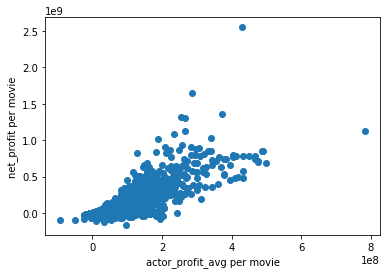

In [123]:
plt.scatter(actors_profit['cast_avg'],actors_profit['net_profit'])
plt.xlabel('actor_profit_avg per movie')
plt.ylabel('net_profit per movie')
plt.show()

## 수정
- 해당row의 net_profit은 actor_profit에서 제외해야한다: 
- 수정2: 개봉 "전"작기준으로 해야함 : release_date도 고려해야함....

In [134]:
 ## actors_profit 테이블생성
a_profit = pd.merge(actors,sample[['movie_id','net_profit']], how='inner', on='movie_id')

 ## net_profit_sum, freq
a_profit['actor_sum'] = a_profit.actor_id.map(a_profit.groupby('actor_id')['net_profit'].sum()) - a_profit['net_profit']
a_profit['freq'] = actors.actor_id.map(actors['actor_id'].value_counts()) - 1 #빈도수-1

  ## net_profit_avg
a_profit['actor_avg'] = a_profit['actor_sum'] / a_profit['freq']
a_profit.sort_values('actor_id')


,actor_id,name,movie_id,net_profit,actor_sum,freq,actor_avg
11933,2,Mark Hamill,11,764398007,1060750000,2,5.303750e+08
6745,2,Mark Hamill,1892,540350000,1284798007,2,6.423990e+08
8752,2,Mark Hamill,1891,520400000,1304748007,2,6.523740e+08
1850,3,Harrison Ford,4477,50807547,4778247144,27,1.769721e+08
15271,3,Harrison Ford,592,2820000,4826234691,27,1.787494e+08
4910,3,Harrison Ford,9869,133051587,4696003104,27,1.739260e+08
8753,3,Harrison Ford,1891,520400000,4308654691,27,1.595798e+08
5432,3,Harrison Ford,109410,55020213,4774034478,27,1.768161e+08
5135,3,Harrison Ford,5503,324875760,4504178931,27,1.668214e+08
2600,3,Harrison Ford,11375,-23857341,4852912032,27,1.797375e+08


In [46]:
 ## cast_profit_sum per movie
a_profit['cast_sum'] = a_profit.movie_id.map(a_profit.groupby('movie_id')['actor_avg'].sum()) #배우들의 각 전작품 평균 합하기
grouped = a_profit.groupby('movie_id') 
a_profit['num'] = a_profit.movie_id.map(grouped['actor_avg'].count()) #첫 작품인경우 cast평균연산에서 제외

  ## cast_profit_avg per movie 
a_profit['cast_avg'] = a_profit['cast_sum'] / a_profit['num'] 

a_profit = a_profit.sort_values('movie_id').drop_duplicates('movie_id',keep='first') #per_movie
# ab = a_profit.drop(['actor_id','name','actor_sum','freq','actor_avg','cast_sum','num'],axis=1) #3227 rows 
# ab = ab.dropna() # 3100
# ab
# a_profit[15055]
# a_profit.loc[a_profit['movie_id']==55]


In [47]:
a_profit.corr() #296961

,net_profit,actor_sum,freq,actor_avg,cast_sum,num,cast_avg
net_profit,1.000000,0.198686,0.129316,0.231101,0.386032,0.180454,0.296961
actor_sum,0.198686,1.000000,0.823720,0.573065,0.397033,0.304777,0.273849
freq,0.129316,0.823720,1.000000,0.190094,0.277345,0.388277,0.107440
actor_avg,0.231101,0.573065,0.190094,1.000000,0.530872,0.075508,0.588459
cast_sum,0.386032,0.397033,0.277345,0.530872,1.000000,0.557903,0.837733
num,0.180454,0.304777,0.388277,0.075508,0.557903,1.000000,0.114589
cast_avg,0.296961,0.273849,0.107440,0.588459,0.837733,0.114589,1.000000


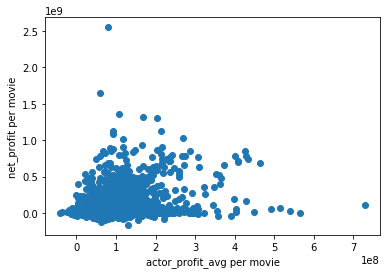

In [27]:
plt.scatter(a_profit['cast_avg'],a_profit['net_profit'])
plt.xlabel('actor_profit_avg per movie')
plt.ylabel('net_profit per movie')
plt.show()

## 수정2 

### 개봉일 기준 배우효과 
배우가 출연한 모든 작품의 net_profit 평균 or 합
개봉 "전" 작품 기준으로 해야함 : release_date도 고려해야함....

- 이전 작품 net_profit누적합의 평균 _출연횟수 고려: a_avg
- 이전 작품 net_profit누적합 _출연횟수고려x: a_cumsum


In [135]:
## actors_profit 테이블생성
ar_profit = pd.merge(actors,sample[['movie_id','net_profit','release_date']], how='inner', on='movie_id')

## release date 고려 추가
ar_profit = ar_profit.sort_values(['actor_id','release_date']).reset_index(drop = True)

## 배우별 이전작품 net_profit누적합
ar_profit['a_cumsum'] = ar_profit.groupby('actor_id')['net_profit'].cumsum() - ar_profit['net_profit']
ar_profit


,actor_id,name,movie_id,net_profit,release_date,a_cumsum
0,2,Mark Hamill,11,764398007,1977-05-25,0
1,2,Mark Hamill,1891,520400000,1980-05-17,764398007
2,2,Mark Hamill,1892,540350000,1983-05-23,1284798007
3,3,Harrison Ford,592,2820000,1974-04-07,0
4,3,Harrison Ford,11,764398007,1977-05-25,2820000
5,3,Harrison Ford,17339,2230000,1978-11-01,767218007
6,3,Harrison Ford,1891,520400000,1980-05-17,769448007
7,3,Harrison Ford,85,371925971,1981-06-12,1289848007
8,3,Harrison Ford,78,5139618,1982-06-25,1661773978
9,3,Harrison Ford,1892,540350000,1983-05-23,1666913596


In [136]:
## 배우별 이전작품 누적freq
ar_profit['count'] = ar_profit.groupby('actor_id').cumcount()


## 배우별 이전작품 누적profit_avg
ar_profit['a_avg'] = ar_profit['a_cumsum'] / ar_profit['count']
# ar_profit

## 추가: actor_avg nan처리 - 평균값으로
ar_profit['a_avg'] = ar_profit['a_avg'].fillna(ar_profit.groupby('actor_id')['a_avg'].transform('mean'))
ar_profit.sort_values('actor_id')

,actor_id,name,movie_id,net_profit,release_date,a_cumsum,count,a_avg
0,2,Mark Hamill,11,764398007,1977-05-25,0,0,7.033985e+08
1,2,Mark Hamill,1891,520400000,1980-05-17,764398007,1,7.643980e+08
2,2,Mark Hamill,1892,540350000,1983-05-23,1284798007,2,6.423990e+08
30,3,Harrison Ford,293863,40663276,2015-04-16,4788391415,27,1.773478e+08
29,3,Harrison Ford,138103,116172544,2014-08-04,4672218871,26,1.797007e+08
28,3,Harrison Ford,80274,15537191,2013-10-23,4656681680,25,1.862673e+08
27,3,Harrison Ford,109410,55020213,2013-04-12,4601661467,24,1.917359e+08
26,3,Harrison Ford,27569,-15865707,2010-01-21,4617527174,23,2.007621e+08
25,3,Harrison Ford,38357,18785180,2010-01-12,4598741994,22,2.090337e+08
24,3,Harrison Ford,217,601636033,2008-05-21,3997105961,21,1.903384e+08


### 수정2 - 영화별 배우효과 계산
주연배우들의 배우효과 합하기 
- 배우효과에 출연횟수 고려한 경우: a_avg -> cast_sum
- 추가: 배우효과에 출연횟수 고려안한 경우(누적합): a_cumsum -> cast_sum2

In [137]:
 ## 영화별 cast들의 profit평균합하기: cast_sum
ar_profit['cast_sum'] = ar_profit.movie_id.map(ar_profit.groupby('movie_id')['a_avg'].sum()) 
grouped = ar_profit.groupby('movie_id') 

 ##영화별 cast들의 profit평균합의 평균: cast_avg 이거할 필요없잖아
ar_profit['num'] = ar_profit.movie_id.map(grouped['a_avg'].count()) #첫 작품인경우 cast평균연산에서 제외하기위해
ar_profit['cast_avg'] = ar_profit['cast_sum'] / ar_profit['num'] 

# ar_profit = ar_profit.sort_values('movie_id').drop_duplicates('movie_id',keep='first') #per_movie
ar_profit


,actor_id,name,movie_id,net_profit,release_date,a_cumsum,count,a_avg,cast_sum,num,cast_avg
0,2,Mark Hamill,11,764398007,1977-05-25,0,0,7.033985e+08,1.280770e+09,4,3.201925e+08
1,2,Mark Hamill,1891,520400000,1980-05-17,764398007,1,7.643980e+08,2.687880e+09,5,5.375760e+08
2,2,Mark Hamill,1892,540350000,1983-05-23,1284798007,2,6.423990e+08,2.130636e+09,5,4.261272e+08
3,3,Harrison Ford,592,2820000,1974-04-07,0,0,2.448638e+08,4.508014e+08,5,9.016027e+07
4,3,Harrison Ford,11,764398007,1977-05-25,2820000,1,2.820000e+06,1.280770e+09,4,3.201925e+08
5,3,Harrison Ford,17339,2230000,1978-11-01,767218007,2,3.836090e+08,7.658074e+08,5,1.531615e+08
6,3,Harrison Ford,1891,520400000,1980-05-17,769448007,3,2.564827e+08,2.687880e+09,5,5.375760e+08
7,3,Harrison Ford,85,371925971,1981-06-12,1289848007,4,3.224620e+08,1.754877e+09,5,3.509753e+08
8,3,Harrison Ford,78,5139618,1982-06-25,1661773978,5,3.323548e+08,4.415545e+08,5,8.831090e+07
9,3,Harrison Ford,1892,540350000,1983-05-23,1666913596,6,2.778189e+08,2.130636e+09,5,4.261272e+08


In [142]:
#추가: 배우효과를 누적합으로 계산한경우

 ## 영화별 cast들의 누적profit합하기: cast_cumsum 313504
ar_profit['cast_sum2'] = ar_profit.movie_id.map(ar_profit.groupby('movie_id')['a_cumsum'].sum()) 
ar_profit.sort_values(['movie_id'])


,actor_id,name,movie_id,net_profit,release_date,a_cumsum,count,a_avg,cast_sum,num,cast_avg,cast_sum2
3766,3141,Marisa Tomei,5,300000,1995-12-09,44921378,2,2.246069e+07,2.677725e+08,5,5.355450e+07,44921378
0,2,Mark Hamill,11,764398007,1977-05-25,0,0,7.033985e+08,1.280770e+09,4,3.201925e+08,0
49,18,Brad Garrett,12,846335536,2003-05-30,0,0,8.463355e+08,9.786138e+08,3,3.262046e+08,0
93,32,Robin Wright,13,622945399,1994-07-06,14857814,1,1.485781e+07,1.501038e+09,5,3.002077e+08,14857814
1056,516,Annette Bening,14,341296601,1999-09-15,123923425,3,4.130781e+07,6.374874e+08,5,1.274975e+08,123923425
166,53,Peter Stormare,16,27231879,2000-05-17,0,0,1.959384e+07,1.614733e+08,3,5.382444e+07,0
229,64,Gary Oldman,18,173920180,1997-05-07,293256877,6,4.887615e+07,2.379439e+08,5,4.758877e+07,293256877
260,74,Gustav Fröhlich,19,-91969578,1927-01-10,0,0,NaN,0.000000e+00,0,NaN,0
2349,1709,Jack Davenport,22,515011224,2003-07-09,0,0,5.150112e+08,1.469077e+09,5,2.938153e+08,0
1215,589,Daryl Hannah,24,150949000,2003-10-10,67104606,5,1.342092e+07,1.685106e+08,5,3.370212e+07,67104606


In [139]:
ar_profit = ar_profit.sort_values('movie_id').drop_duplicates('movie_id',keep='first') #per_movies
ar_profit

,actor_id,name,movie_id,net_profit,release_date,a_cumsum,count,a_avg,cast_sum,num,cast_avg,cast_sum2
3766,3141,Marisa Tomei,5,300000,1995-12-09,44921378,2,2.246069e+07,2.677725e+08,5,5.355450e+07,618149575
0,2,Mark Hamill,11,764398007,1977-05-25,0,0,7.033985e+08,1.280770e+09,4,3.201925e+08,174723748
49,18,Brad Garrett,12,846335536,2003-05-30,0,0,8.463355e+08,9.786138e+08,3,3.262046e+08,1233676226
93,32,Robin Wright,13,622945399,1994-07-06,14857814,1,1.485781e+07,1.501038e+09,5,3.002077e+08,874771342
1056,516,Annette Bening,14,341296601,1999-09-15,123923425,3,4.130781e+07,6.374874e+08,5,1.274975e+08,1134055886
166,53,Peter Stormare,16,27231879,2000-05-17,0,0,1.959384e+07,1.614733e+08,3,5.382444e+07,458590428
229,64,Gary Oldman,18,173920180,1997-05-07,293256877,6,4.887615e+07,2.379439e+08,5,4.758877e+07,1158216438
260,74,Gustav Fröhlich,19,-91969578,1927-01-10,0,0,NaN,0.000000e+00,0,NaN,0
2349,1709,Jack Davenport,22,515011224,2003-07-09,0,0,5.150112e+08,1.469077e+09,5,2.938153e+08,2197944082
1215,589,Daryl Hannah,24,150949000,2003-10-10,67104606,5,1.342092e+07,1.685106e+08,5,3.370212e+07,631402393


In [141]:
# ar_profit.corr() #cast_cumsum 484123  #cast_avg 432817
ar_profit.drop(['count','a_avg','num','a_cumsum'],axis=1).corr()

,net_profit,cast_sum,cast_avg,cast_sum2
net_profit,1.000000,0.484123,0.432817,0.313504
cast_sum,0.484123,1.000000,0.900441,0.566679
cast_avg,0.432817,0.900441,1.000000,0.444204
cast_sum2,0.313504,0.566679,0.444204,1.000000


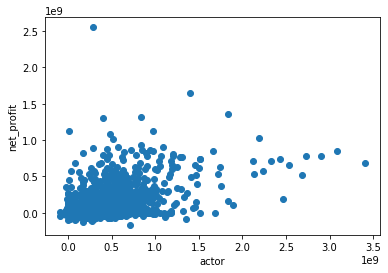

In [146]:
plt.scatter(ar_profit['cast_sum'],ar_profit['net_profit'])
plt.xlabel('actor_profit_sum')
plt.ylabel('net_profit')
plt.show()